<a href="https://colab.research.google.com/github/JeffYu12/Group-Project-/blob/main/Group_Project_DSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

!wget -O Player_Stats.xlsx "https://github.com/JeffYu12/Group-Project-/raw/main/Player%20Stats.xlsx"

data = pd.read_excel("Player_Stats.xlsx", sheet_name=None)
data_kings = pd.read_excel("Player_Stats.xlsx", sheet_name='Shooting 22-23 vs Kings')
data_Hornets = pd.read_excel("Player_Stats.xlsx", sheet_name='Shooting 22-23 vs Hornets')
data_Cavaliers = pd.read_excel("Player_Stats.xlsx", sheet_name='Shooting 22-23 vs Cavaliers')

--2024-11-05 17:31:39--  https://github.com/JeffYu12/Group-Project-/raw/main/Player%20Stats.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Group-Project-/main/Player%20Stats.xlsx [following]
--2024-11-05 17:31:39--  https://raw.githubusercontent.com/JeffYu12/Group-Project-/main/Player%20Stats.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57443 (56K) [application/octet-stream]
Saving to: ‘Player_Stats.xlsx’

Player_Stats.xlsx   100%[===================>]  56.10K  --.-KB/s    in 0.001s  

2024-11-05 17:31:39 (55.1 MB/s) - ‘Player_Stats.xlsx’ saved [57443/57443]



In [71]:
data['Shooting 22-23 vs Kings']

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,Jayson Tatum SF,12.0,21.0,57.1,2.0,6.5,30.8,7.0,10.0,70.0,10.0,14.5,69.0,1.571,0.62
1,Jaylen Brown SG,9.5,16.0,59.4,2.5,5.5,45.5,4.5,4.5,100.0,7.0,10.5,66.7,1.625,0.67
2,Derrick White PG,6.0,11.0,54.5,4.0,8.5,47.1,2.0,3.0,66.7,2.0,2.5,80.0,1.636,0.73
3,Al Horford C,4.5,7.0,64.3,3.0,4.0,75.0,0.0,0.0,0.0,1.5,3.0,50.0,1.714,0.86
4,Marcus Smart PG,3.0,9.5,31.6,1.5,6.0,25.0,3.0,3.5,85.7,1.5,3.5,42.9,1.105,0.39
5,Payton Pritchard PG,2.0,4.0,50.0,2.0,3.0,66.7,3.0,4.0,75.0,0.0,1.0,0.0,2.250,0.75
6,Malcolm Brogdon PG,2.5,8.5,29.4,1.0,3.0,33.3,0.0,0.0,0.0,1.5,5.5,27.3,0.706,0.35
7,Sam Hauser SF,2.0,4.0,50.0,2.0,4.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500,0.75
8,Robert Williams III C,2.0,4.0,50.0,0.0,0.0,0.0,2.0,2.0,100.0,2.0,4.0,50.0,1.500,0.50
9,Grant Williams PF,1.5,3.5,42.9,0.0,1.0,0.0,1.0,1.0,100.0,1.5,2.5,60.0,1.143,0.43


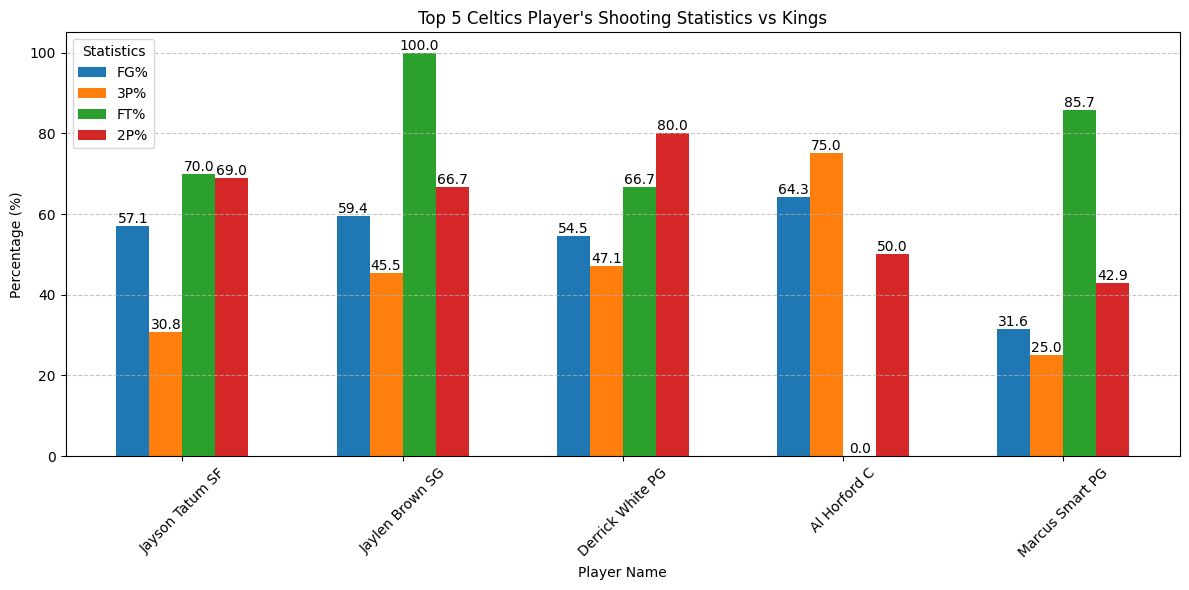

In [72]:
data = pd.DataFrame({
    'Name': ['Jayson Tatum SF', 'Jaylen Brown SG', 'Derrick White PG', 'Al Horford C', 'Marcus Smart PG'],
    'FG%': [57.1, 59.4, 54.5, 64.3, 31.6],
    '3P%': [30.8, 45.5, 47.1, 75.0, 25.0],
    'FT%': [70.0, 100.0, 66.7, 0.0, 85.7],
    '2P%': [69.0, 66.7, 80.0, 50.0, 42.9],
})

# Set the index to 'Name' for easier plotting
data.set_index('Name', inplace=True)

# Plotting selected statistics as a bar graph for each player
bar_width = 0.15  # Width of the bars
x = range(len(data.index))  # The label locations

plt.figure(figsize=(12, 6))

# Create bars for each statistic
for i, stat in enumerate(['FG%', '3P%', 'FT%', '2P%']):
    bars = plt.bar([p + bar_width * i for p in x], data[stat], width=bar_width, label=stat)

    # Adding values above the bars
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1),
                 ha='center', va='bottom', fontsize=10)  # Add the value above the bar

# Customize the plot
plt.xlabel("Player Name")
plt.ylabel("Percentage (%)")
plt.title("Top 5 Celtics Player's Shooting Statistics vs Kings")
plt.xticks([p + bar_width * (len(['FG%', '3P%', 'FT%', '2P%']) / 2 - 0.5) for p in x], data.index, rotation=45)  # Center x-ticks
plt.legend(title='Statistics')
plt.tight_layout()  # Adjust layout to fit labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines
plt.show()

In [77]:
print(data_Hornets)

                     Name   FGM   FGA    FG%   3PM   3PA   3P%   FTM   FTA  \
0         Jayson Tatum SF  13.8  24.8   55.6   5.0  12.5  40.0   7.5   8.0   
1        Derrick White PG   6.3  10.3   61.0   4.0   6.8  59.3   2.3   2.3   
2      Malcolm Brogdon PG   6.5  11.3   57.8   3.0   5.3  57.1   1.5   1.8   
3         Marcus Smart PG   5.7  11.3   50.0   3.3   8.3  40.0   0.3   0.7   
4            Al Horford C   4.5   9.0   50.0   3.0   5.5  54.5   0.0   0.0   
5        Mike Muscala C *   4.0   8.0   50.0   4.0   8.0  50.0   0.0   0.0   
6        Blake Griffin PF   3.0   4.0   75.0   1.0   2.0  50.0   0.0   0.0   
7           Sam Hauser SF   2.3   5.5   40.9   1.8   4.5  38.9   0.0   0.0   
8       Grant Williams PF   2.0   7.0   28.6   1.5   3.5  42.9   0.8   0.8   
9     Payton Pritchard PG   2.5   8.0   31.3   1.3   5.0  25.0   0.0   0.0   
10  Robert Williams III C   3.0   5.0   60.0   0.0   0.0   0.0   0.0   0.7   
11          Luke Kornet C   2.3   2.3  100.0   0.0   0.0   0.0  

In [78]:
print(data_Cavaliers)

                     Name   FGM   FGA    FG%   3PM   3PA   3P%   FTM   FTA  \
0         Jayson Tatum SF  10.7  20.3   52.5   3.0   7.3  40.9   8.7  10.0   
1         Jaylen Brown SG   9.8  22.3   43.8   2.0   7.3  27.6   6.0   7.8   
2            Al Horford C   6.0   9.3   64.3   3.0   5.3  56.3   0.7   0.7   
3         Marcus Smart PG   3.8  13.8   27.3   2.0   7.0  28.6   3.5   4.3   
4      Malcolm Brogdon PG   4.5   8.8   51.4   1.3   3.0  41.7   2.3   2.3   
5       Grant Williams PF   3.5   6.5   53.8   3.0   5.5  54.5   1.5   3.0   
6   Robert Williams III C   4.0   4.0  100.0   0.0   0.0   0.0   3.0   3.0   
7        Derrick White PG   2.8   7.0   39.3   1.0   3.0  33.3   0.5   0.5   
8     Payton Pritchard PG   2.0   8.0   25.0   1.0   6.0  16.7   2.0   2.0   
9        Blake Griffin PF   1.5   2.5   60.0   0.5   1.5  33.3   2.0   2.0   
10          Sam Hauser SF   1.3   2.3   55.6   1.0   2.0  50.0   0.0   0.0   
11          Luke Kornet C   1.3   2.7   50.0   0.0   0.0   0.0  